In [13]:
import h5py
import numpy as np
import warnings
warnings.filterwarnings("ignore")
def load_dataset():
    fn =   'train_signs.h5'
    train_dataset = h5py.File(fn, "r")
    X_train = np.array(train_dataset["train_set_x"][:])
    Y_train = np.array(train_dataset["train_set_y"][:])

    fn ='test_signs.h5'
    test_dataset =  h5py.File(fn, "r")
    X_test = np.array(test_dataset["test_set_x"][:])
    Y_test = np.array(test_dataset["test_set_y"][:])

    classes = np.array(test_dataset["list_classes"][:])
    
    return X_train, Y_train, X_test, Y_test, classes
train_data, train_labels, test_data, test_labels, classes = load_dataset()

print ('train_data.shape=', train_data.shape)
print ('train_labels.shape=',  train_labels.shape)
print ('test_data.shape=', test_data.shape)
print ('test_labels.shape=', test_labels.shape)

train_data.shape= (1080, 64, 64, 3)
train_labels.shape= (1080,)
test_data.shape= (120, 64, 64, 3)
test_labels.shape= (120,)


In [14]:
def display_samples_in_grid(X, n_rows, n_cols= None, y = None ):
    if n_cols is None:
        n_cols= n_rows
    indices = np.random.randint(0, len(X),n_rows*n_cols)
    for i in range (n_rows):
        for j in range (n_cols):
            index = n_cols*i+j
            ax = plt.subplot(n_rows,n_cols,index+1)
            ax.imshow(X[indices[index]], cmap='Greys')
            if not (y is None):
                plt.title(y[indices[index]])
            plt.axis('off')

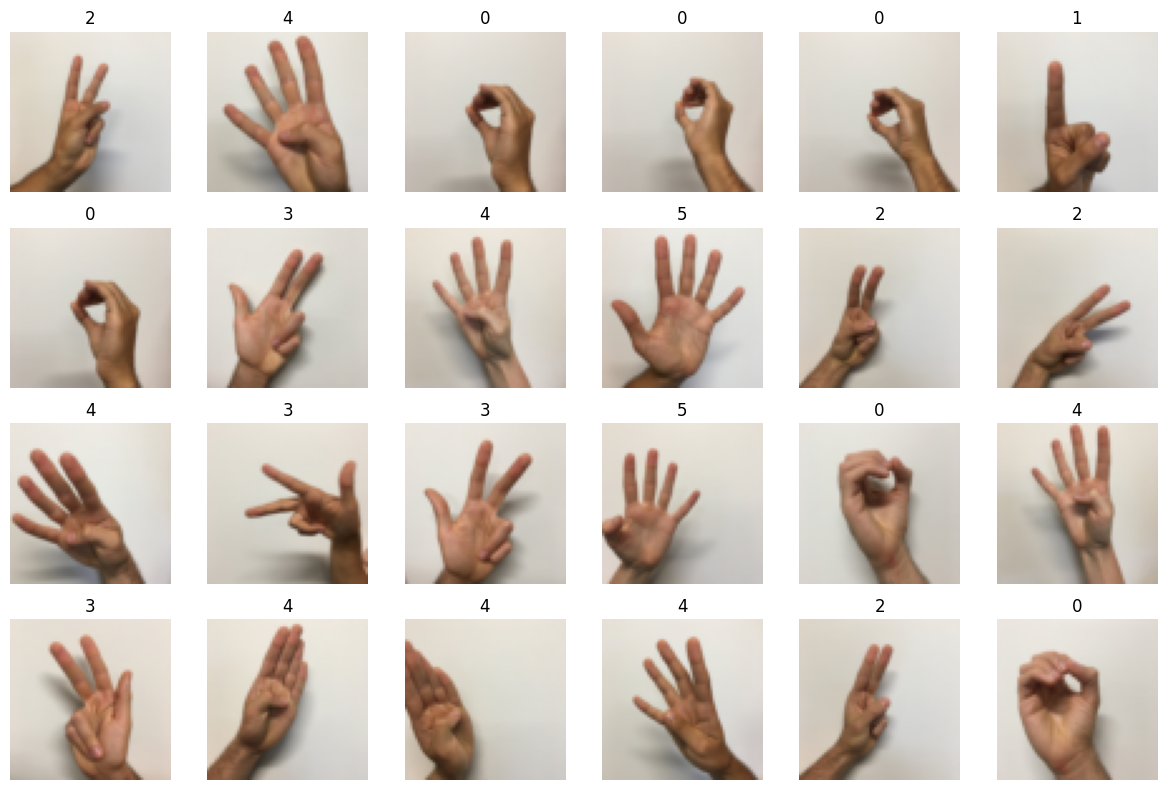

In [15]:
import matplotlib.pyplot as plt
plt.figure(figsize= (12,8))
display_samples_in_grid(train_data, n_rows=4, n_cols=6, y= train_labels.T)
plt.tight_layout(h_pad=1, w_pad=1)

In [16]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.utils import to_categorical

X_train = train_data / 255.
X_test = test_data / 255.

Y_train = to_categorical(train_labels, num_classes=len(classes))
Y_test = to_categorical(test_labels, num_classes=len(classes))

print('X_train shape:', X_train.shape)
print('Y_train shape:', Y_train.shape)
print('X_test shape:', X_test.shape)
print('Y_test shape:', Y_test.shape)

model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(X_train.shape[1], X_train.shape[2], X_train.shape[3])),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(64, activation='relu'),
    Dropout(0.5),
    Dense(len(classes), activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

model.fit(X_train, Y_train, epochs=10, batch_size=64)

loss, accuracy = model.evaluate(X_test, Y_test)
print(f"Test accuracy: {accuracy*100:.2f}%")

X_train shape: (1080, 64, 64, 3)
Y_train shape: (1080, 6)
X_test shape: (120, 64, 64, 3)
Y_test shape: (120, 6)
Epoch 1/10


17/17 [==============================] - 3s 79ms/step - loss: 1.8403 - accuracy: 0.1620
Epoch 2/10
17/17 [==============================] - 1s 81ms/step - loss: 1.7485 - accuracy: 0.2491
Epoch 3/10
17/17 [==============================] - 1s 76ms/step - loss: 1.6028 - accuracy: 0.3333
Epoch 4/10
17/17 [==============================] - 1s 79ms/step - loss: 1.4860 - accuracy: 0.3731
Epoch 5/10
17/17 [==============================] - 1s 80ms/step - loss: 1.3666 - accuracy: 0.4491
Epoch 6/10
17/17 [==============================] - 1s 76ms/step - loss: 1.2459 - accuracy: 0.5083
Epoch 7/10
17/17 [==============================] - 1s 83ms/step - loss: 1.1491 - accuracy: 0.5509
Epoch 8/10
17/17 [==============================] - 1s 85ms/step - loss: 1.1505 - accuracy: 0.5574
Epoch 9/10
17/17 [==============================] - 1s 87ms/step - loss: 1.1294 - accuracy: 0.

In [17]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 62, 62, 32)        896       
                                                                 
 max_pooling2d_8 (MaxPoolin  (None, 31, 31, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_9 (Conv2D)           (None, 29, 29, 64)        18496     
                                                                 
 max_pooling2d_9 (MaxPoolin  (None, 14, 14, 64)        0         
 g2D)                                                            
                                                                 
 flatten_4 (Flatten)         (None, 12544)             0         
                                                                 
 dense_8 (Dense)             (None, 64)               

In [19]:
model = Sequential([
    
    Conv2D(32, (3, 3), activation='relu', input_shape=(X_train.shape[1], X_train.shape[2], X_train.shape[3])),
    MaxPooling2D((2, 2)),

    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),

    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),

    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(len(classes), activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

model.fit(X_train, Y_train, epochs=10, batch_size=64)

loss, accuracy = model.evaluate(X_test, Y_test)
print(f"Test accuracy: {accuracy*100:.2f}%")

Epoch 1/10
17/17 [==============================] - 3s 118ms/step - loss: 1.8027 - accuracy: 0.1583
Epoch 2/10
17/17 [==============================] - 2s 103ms/step - loss: 1.7902 - accuracy: 0.1769
Epoch 3/10
17/17 [==============================] - 2s 116ms/step - loss: 1.7548 - accuracy: 0.2111
Epoch 4/10
17/17 [==============================] - 2s 112ms/step - loss: 1.7121 - accuracy: 0.2889
Epoch 5/10
17/17 [==============================] - 2s 112ms/step - loss: 1.5317 - accuracy: 0.3667
Epoch 6/10
17/17 [==============================] - 2s 108ms/step - loss: 1.3645 - accuracy: 0.4630
Epoch 7/10
17/17 [==============================] - 2s 99ms/step - loss: 1.2092 - accuracy: 0.5269
Epoch 8/10
17/17 [==============================] - 2s 102ms/step - loss: 1.0767 - accuracy: 0.5657
Epoch 9/10
17/17 [==============================] - 2s 105ms/step - loss: 0.9547 - accuracy: 0.6417
Epoch 10/10
4/4 [==============================] - 0s 13ms/step - loss: 0.5731 - accuracy: 0.7750
Tes

In [20]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_13 (Conv2D)          (None, 62, 62, 32)        896       
                                                                 
 max_pooling2d_13 (MaxPooli  (None, 31, 31, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_14 (Conv2D)          (None, 29, 29, 64)        18496     
                                                                 
 max_pooling2d_14 (MaxPooli  (None, 14, 14, 64)        0         
 ng2D)                                                           
                                                                 
 conv2d_15 (Conv2D)          (None, 12, 12, 128)       73856     
                                                                 
 max_pooling2d_15 (MaxPooli  (None, 6, 6, 128)        

In [22]:
model = Sequential([
    
    Conv2D(32, (3, 3), activation='tanh', input_shape=(X_train.shape[1], X_train.shape[2], X_train.shape[3])),
    MaxPooling2D((2, 2)),

    Conv2D(64, (3, 3), activation='tanh'),
    MaxPooling2D((2, 2)),

    Conv2D(128, (3, 3), activation='tanh'),
    MaxPooling2D((2, 2)),

    Flatten(),
    Dense(128, activation='tanh'),
    Dropout(0.5),
    Dense(64, activation='tanh'),
    Dropout(0.3),
    Dense(len(classes), activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

model.fit(X_train, Y_train, epochs=10, batch_size=64)

loss, accuracy = model.evaluate(X_test, Y_test)
print(f"Test accuracy: {accuracy*100:.2f}%")

Epoch 1/10
17/17 [==============================] - 3s 113ms/step - loss: 1.8274 - accuracy: 0.2287
Epoch 2/10
17/17 [==============================] - 2s 106ms/step - loss: 1.3689 - accuracy: 0.4676
Epoch 3/10
17/17 [==============================] - 2s 97ms/step - loss: 0.9946 - accuracy: 0.6454
Epoch 4/10
17/17 [==============================] - 2s 102ms/step - loss: 0.8035 - accuracy: 0.7259
Epoch 5/10
17/17 [==============================] - 2s 99ms/step - loss: 0.7055 - accuracy: 0.7565
Epoch 6/10
17/17 [==============================] - 2s 107ms/step - loss: 0.6756 - accuracy: 0.7611
Epoch 7/10
17/17 [==============================] - 2s 100ms/step - loss: 0.4828 - accuracy: 0.8481
Epoch 8/10
17/17 [==============================] - 2s 100ms/step - loss: 0.4153 - accuracy: 0.8667
Epoch 9/10
17/17 [==============================] - 2s 111ms/step - loss: 0.3363 - accuracy: 0.8917
Epoch 10/10
4/4 [==============================] - 0s 15ms/step - loss: 0.2676 - accuracy: 0.9167
Test

In [23]:
model = Sequential([
    
    Conv2D(32, (3, 3), activation='sigmoid', input_shape=(X_train.shape[1], X_train.shape[2], X_train.shape[3])),
    MaxPooling2D((2, 2)),

    Conv2D(64, (3, 3), activation='sigmoid'),
    MaxPooling2D((2, 2)),

    Conv2D(128, (3, 3), activation='sigmoid'),
    MaxPooling2D((2, 2)),

    Flatten(),
    Dense(128, activation='sigmoid'),
    Dropout(0.5),
    Dense(64, activation='sigmoid'),
    Dropout(0.3),
    Dense(len(classes), activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

model.fit(X_train, Y_train, epochs=10, batch_size=64)

loss, accuracy = model.evaluate(X_test, Y_test)
print(f"Test accuracy: {accuracy*100:.2f}%")

Epoch 1/10
17/17 [==============================] - 3s 99ms/step - loss: 1.9273 - accuracy: 0.1620
Epoch 2/10
17/17 [==============================] - 2s 99ms/step - loss: 1.8710 - accuracy: 0.1843
Epoch 3/10
17/17 [==============================] - 2s 100ms/step - loss: 1.8713 - accuracy: 0.1657
Epoch 4/10
17/17 [==============================] - 2s 99ms/step - loss: 1.8754 - accuracy: 0.1509
Epoch 5/10
17/17 [==============================] - 2s 101ms/step - loss: 1.8733 - accuracy: 0.1565
Epoch 6/10
17/17 [==============================] - 2s 108ms/step - loss: 1.8646 - accuracy: 0.1574
Epoch 7/10
17/17 [==============================] - 2s 110ms/step - loss: 1.8481 - accuracy: 0.1593
Epoch 8/10
17/17 [==============================] - 2s 110ms/step - loss: 1.8352 - accuracy: 0.1769
Epoch 9/10
17/17 [==============================] - 2s 104ms/step - loss: 1.8276 - accuracy: 0.1602
Epoch 10/10
4/4 [==============================] - 0s 18ms/step - loss: 1.7923 - accuracy: 0.1667
Test 

In [24]:
model = Sequential([
    
    Conv2D(32, (3, 3), activation='relu', input_shape=(X_train.shape[1], X_train.shape[2], X_train.shape[3])),
    MaxPooling2D((2, 2)),

    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),

    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),

    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(64, activation='relu'),
    Dropout(0.5),
    Dense(len(classes), activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

model.fit(X_train, Y_train, epochs=10, batch_size=64)

loss, accuracy = model.evaluate(X_test, Y_test)
print(f"Test accuracy: {accuracy*100:.2f}%")

Epoch 1/10
17/17 [==============================] - 3s 91ms/step - loss: 1.7993 - accuracy: 0.1759
Epoch 2/10
17/17 [==============================] - 2s 92ms/step - loss: 1.7934 - accuracy: 0.1500
Epoch 3/10
17/17 [==============================] - 2s 89ms/step - loss: 1.7913 - accuracy: 0.1852
Epoch 4/10
17/17 [==============================] - 2s 91ms/step - loss: 1.7639 - accuracy: 0.2231
Epoch 5/10
17/17 [==============================] - 2s 91ms/step - loss: 1.6429 - accuracy: 0.3296
Epoch 6/10
17/17 [==============================] - 2s 92ms/step - loss: 1.4648 - accuracy: 0.4148
Epoch 7/10
17/17 [==============================] - 2s 92ms/step - loss: 1.2962 - accuracy: 0.4889
Epoch 8/10
17/17 [==============================] - 2s 99ms/step - loss: 1.1719 - accuracy: 0.5519
Epoch 9/10
17/17 [==============================] - 2s 101ms/step - loss: 0.9893 - accuracy: 0.6278
Epoch 10/10
4/4 [==============================] - 0s 16ms/step - loss: 0.7410 - accuracy: 0.7083
Test accur